In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
datos = pd.read_csv("/content/drive/My Drive/Entrenamieto_ECI_2020.csv")

Mounted at /content/drive


In [2]:
datos["Billing_Country"].value_counts()

Japan                     4879
United States             3802
Germany                   1979
Australia                 1169
India                      672
                          ... 
Kenya                        1
Libya                        1
Bosnia and Herzegovina       1
Oman                         1
Belize                       1
Name: Billing_Country, Length: 80, dtype: int64

In [3]:
datos["Stage_int"] = (datos["Stage"] == "Closed Won").astype(int)
datos["Billing_Country_Count"] = datos.groupby("Billing_Country")["Stage"].transform("count")
datos_billing = datos.loc[datos["Billing_Country_Count"] > datos["Billing_Country_Count"].mean() * 0.1] #Elimino paises poco significativos que puedan sesgar
datos_billing = datos_billing.groupby("Billing_Country").agg({"Stage_int" : "mean"})

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

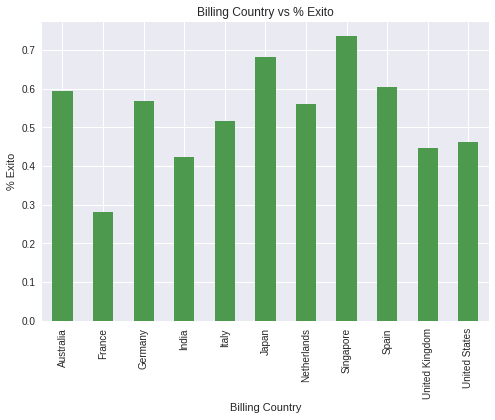

In [6]:
datos_billing.plot(kind="bar",color=(0.3,0.6,0.3,1))
plt.title("Billing Country vs % Exito")
plt.legend("")
plt.xlabel("Billing Country")
plt.ylabel("% Exito")
style.use("seaborn")
plt.show()